<a href="https://colab.research.google.com/github/Kristina-Analyst/Python/blob/main/Accounts_Segmentation_RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/MateHometask


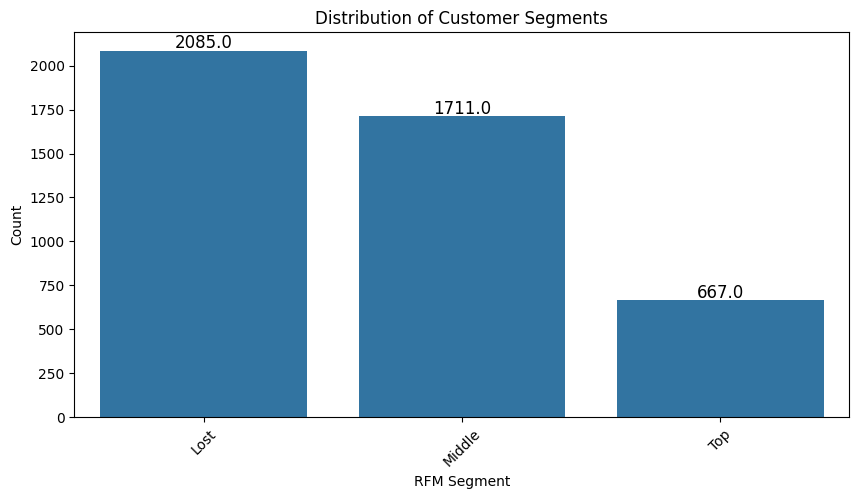


RFM Metrics Summary Statistics:
           recency    frequency     monetary
count  4463.000000  4463.000000  4463.000000
mean     59.268877     3.466054    46.329823
std      26.749646     3.378970    57.953061
min       0.000000     1.000000    10.000000
25%      38.000000     1.000000    10.000000
50%      60.000000     2.000000    30.000000
75%      80.000000     4.000000    60.000000
max     116.000000    26.000000   650.000000

First 5


,account_id,visit_count,last_visit_date,revenue,recency,frequency,monetary,R,F,M,RFM_score,RFM_value,segment_R,segment_F,segment_M,segment_total
0,676055,1,2020-11-02,10,115,1,10,1,1,1,111,1.000000,Lost,Lost,Lost,Lost
1,672927,5,2020-11-22,60,95,5,60,1,4,3,143,2.666667,Lost,Middle,Middle,Middle
2,680137,1,2020-11-01,10,116,1,10,1,1,1,111,1.000000,Lost,Lost,Lost,Lost
3,661672,1,2020-11-27,10,90,1,10,1,1,1,111,1.000000,Lost,Lost,Lost,Lost
4,670629,6,2020-11-09,90,108,6,90,1,4,4,144,3.000000,Lost,Middle,Middle,Middle


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

from google.colab import drive
drive.mount("/content/drive")
%cd /content/drive/MyDrive/MateHometask
df = pd.read_csv("Accounts Segmentation.csv")

df['last_visit_date'] = pd.to_datetime(df['last_visit_date'])
now = pd.to_datetime('2021-02-25')

df["recency"] = (now - df['last_visit_date']).dt.days
df["frequency"] = df["visit_count"]
df["monetary"] = df["revenue"]

df['R'] = pd.qcut(df['recency'], 4, labels=[4, 3, 2, 1]).astype(int)
df['F'] = pd.qcut(df['frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4]).astype(int)
df['M'] = pd.qcut(df['monetary'].rank(method='first'), 4, labels=[1, 2, 3, 4]).astype(int)

df['RFM_score'] = df['R'].astype(str) + df['F'].astype(str) + df['M'].astype(str)
df["RFM_value"] = df[["R", "F", "M"]].mean(axis = 1)

def segment_r(recency):
    if recency <= 30:
        return 'Top'
    elif recency <= 60:
        return 'Middle'
    else:
        return 'Lost'

df['segment_R'] = df['recency'].apply(segment_r)

def segment_f(frequency):
    if frequency >= 15:
        return 'Top'
    elif frequency >= 4:
        return 'Middle'
    else:
        return 'Lost'

df['segment_F'] = df['frequency'].apply(segment_f)

def segment_m(monetary):
    if monetary >= 300:
        return 'Top'
    elif monetary >= 40:
        return 'Middle'
    else:
        return 'Lost'

df['segment_M'] = df['monetary'].apply(segment_m)

def segment(value):
    if value >= 3.5:
        return 'Top'
    elif value >= 2.5:
        return 'Middle'
    else:
        return 'Lost'
df['segment_total'] = df['RFM_value'].apply(segment)

plt.figure(figsize=(10, 5))
bars = sns.countplot(data=df, x='segment_total', order=sorted(df['segment_total'].unique()))
plt.title('Distribution of Customer Segments')
plt.xlabel('RFM Segment')
plt.ylabel('Count')
for bar in bars.patches:
  plt.text(
      bar.get_x()+bar.get_width()/2,
      bar.get_height()-10,
      f"{bar.get_height()}",
      ha = "center",
      va = "bottom",
      color = "black",
      fontsize = 12
  )
plt.xticks(rotation=45)
plt.show()



print("\nRFM Metrics Summary Statistics:")
print(df[['recency', 'frequency', 'monetary']].describe())
print("\nFirst 5")
df.head()



Висновки: Нажаль, в нас більша частина клієнтів Lost, та найменша частина Top. Monetary має найменше топів, всього 41, потім йде Frequency 78, та Recency 754. Найкращі показники у Recency: Top--754, Middle--1501, Lost--2208. У загальному ми маємо Lost--2085, Middle--1711, Top--667. У загальній картині результатів Lost найбільший показник.
